## Machine Learning and Deep Learning in flowers image recognition

### Overview
This is a project developed as a final project at the Data Science bootcamp organised by Sages.

The goal of the project is to recognize the 5 flower classes: daisy, tulip, rose, sunflower, dandelion.
The main idea is to use machine learning algoritms like logistic regression, decision tree, random forest, xgboost and neural network with convolutial layers to check which experiment win.

The measure is accuracy.


### Dataset
This dataset contains 4242 images of flowers. The data collection is based on the data flicr, google images, yandex images.

The pictures are divided into five classes: daisy, tulip, rose, sunflower, dandelion. For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions.

Source: https://www.kaggle.com/alxmamaev/flowers-recognition


### Example picture

I run part of my project on Google Colab, the neural network calculation get faster on GPU.

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/'My Drive'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive


Below I open example picture from my dataset

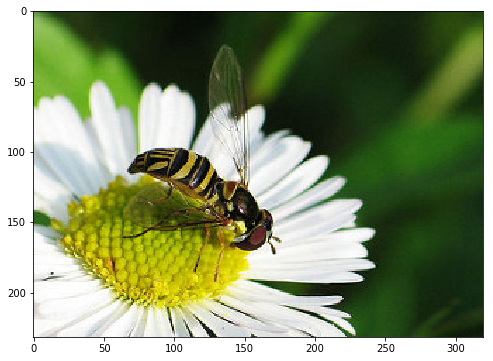

In [5]:
import matplotlib.pyplot as plt 
from PIL import Image
%matplotlib inline
img = Image.open('./flowers/daisy/5547758_eea9edfd54_n.jpg')
plt.figure(figsize=(9, 6))
plt.imshow(img);

### Data preparation

Pictures have different size so we have to resize them to one size.

I choose size (200, 200) as fixed size for all pictures.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sn
import os
import imageio

JPEG (320, 232) RGB


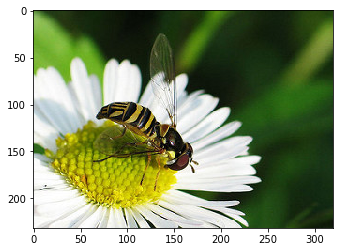

In [15]:
im = Image.open('./flowers/daisy/5547758_eea9edfd54_n.jpg')
print(im.format , im.size, im.mode)
plt.imshow(im)

None (200, 200)


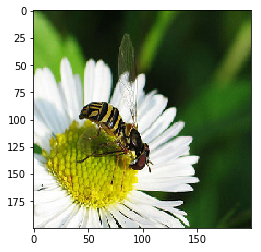

In [0]:
im2 = im.resize((200,200))
print(im2.format, im2.size)
plt.imshow(im2)

Next step is changing colorful images into grayscale. 
When we have colorful picture, each pixel is represeted by 3 numbers - RGB scale. So my dataset will have dimention equal 200 \* 200 \* 3 (image size multiply by 3). 
From calculation speed point of view I want to have lower number of dimention.
When we have grayscale for each pixel we have one number to dataset dimension will be 200 \* 200 \* 1.



In [0]:
data = []
labels = []
folders = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

size = 200, 200

for fol in folders:
    for name in os.listdir('./flowers/'+ fol): #'./flowers/daisy/'
        img = Image.open('./flowers/'+ fol + '/' + str(name))
        img = img.convert('LA')
        img_resize = img.resize(size)
        data.append(np.array(img_resize.getdata(band=0)).flatten())
        labels.append(fol)

In [0]:
data

[array([87, 89, 90, ..., 72, 73, 73]),
 array([29, 30, 34, ..., 53, 57, 58]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([30, 41, 77, ..., 44, 45, 42]),
 array([52, 58, 38, ..., 63, 68, 54]),
 array([151, 153, 153, ...,  26,  21,  17]),
 array([ 18,  16,  16, ..., 109, 111, 105]),
 array([ 3,  2,  3, ..., 69, 65, 58]),
 array([64, 68, 59, ..., 47, 55, 82]),
 array([19, 15, 18, ..., 11, 13, 14]),
 array([99, 87, 68, ..., 14, 33,  9]),
 array([37, 37, 38, ..., 68, 68, 68]),
 array([45, 60, 40, ..., 22, 28, 33]),
 array([31, 44, 13, ..., 33, 12,  0]),
 array([ 0,  0,  0, ..., 13, 18, 21]),
 array([39, 42, 41, ..., 26, 26, 21]),
 array([168, 169, 170, ...,  18,  21,  20]),
 array([246, 248, 245, ..., 150, 144, 149]),
 array([83, 86, 80, ..., 26, 25, 18]),
 array([111, 111, 111, ...,  85,  82,  82]),
 array([197, 191, 188, ..., 122, 116, 124]),
 array([88, 40, 42, ..., 13, 22, 18]),
 array([6, 6, 6, ..., 6, 6, 6]),
 array([85, 89, 44, ..., 47, 36, 88]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array(

In [0]:
labels

['daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',


The list labels contains variable names. I want to transfor them to numbers.
To do this I use LabelEncoder.

In [0]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
labelEncoder.fit(labels)  
y_enc = labelEncoder.transform(labels)

In [0]:
y_enc, y_enc.shape

(array([0, 0, 0, ..., 4, 4, 4]), (4323,))

Next, I change variables name and separate training and test set.

In [0]:
X = data
y = y_enc

In [0]:
X[0].shape

(40000,)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)
X_train = np.array(X_train)
X_test = np.array(X_test)


In [0]:
print("My training set has {} pictures which are describe by {} attributes"
      .format(X_train.shape[0], X_train.shape[1]))
print("My test set has {} pictures which are describe by {} attributes"
      .format(X_test.shape[0], X_test.shape[1]))

My training set has 3458 pictures which are describe by 40000 attributes
My test set has 865 pictures which are describe by 40000 attributes


The number of attributes is still big so I decide to use dimention reduction method - PCA - Principle Components  Analysis.
I create pipeline - first step PCA, second step RandomForest. Using GridSearch I find the best parameters for PCA and Random Forest.


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA as pca

In [0]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([("PCA",pca(whiten = True)),("RandomForestClassifier",RandomForestClassifier())])

/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {"PCA__n_components":[800,1000, 2500],
              "RandomForestClassifier__n_estimators":[500, 1000]}

gs = GridSearchCV(estimator = pipe, param_grid = param_grid,cv = 5, refit = True)

gs.fit(X_train,y_train)
gs.grid_scores_, gs.best_estimator_
gs.best_score_ 
#accuracy_score(y_test, model_1.predict(X_pca_test))

/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


0.35193753614806245

In [0]:
print(gs.grid_scores_, gs.best_estimator_)
gs.best_score_

[mean: 0.34818, std: 0.01428, params: {'PCA__n_components': 800, 'RandomForestClassifier__n_estimators': 500}, mean: 0.35194, std: 0.01118, params: {'PCA__n_components': 800, 'RandomForestClassifier__n_estimators': 1000}, mean: 0.34268, std: 0.01040, params: {'PCA__n_components': 1000, 'RandomForestClassifier__n_estimators': 500}, mean: 0.34326, std: 0.00663, params: {'PCA__n_components': 1000, 'RandomForestClassifier__n_estimators': 1000}, mean: 0.31492, std: 0.01200, params: {'PCA__n_components': 2500, 'RandomForestClassifier__n_estimators': 500}, mean: 0.31377, std: 0.00282, params: {'PCA__n_components': 2500, 'RandomForestClassifier__n_estimators': 1000}] Pipeline(memory=None,
     steps=[('PCA', PCA(copy=True, iterated_power='auto', n_components=800, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)), ('RandomForestClassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_node...n_

/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


0.35193753614806245

The best results is for 800 components.

In [0]:
pca_model = pca(n_components=800)
X_pca_train = pca_model.fit_transform(X_train)


In [0]:
X_pca_train.shape

(3458, 800)

In [0]:
X_pca_test = pca_model.transform(X_test)

In [0]:
X_pca_test.shape

(865, 800)

We have prepared train set so I use a few machine learning algoritms for learning on our set.


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV



At the beginning I choose Logistic Regresion which I dont expect to get good results - this is linear clasificator but our problem isn't linear'

In [0]:
model_1 = LogisticRegression()
model_1.fit(X_pca_train, y_train)

accuracy_score(y_test, model_1.predict(X_pca_test))

0.2855491329479769

In [0]:
param_grid_1 = {"penalty":["l1","l2"],
              "C":[10,1,0.1]}

gs_1 = GridSearchCV( estimator=model_1, param_grid=param_grid_1, cv = 5, refit = True)
gs_1.fit(X_pca_train, y_train)
gs_1.grid_scores_, gs_1.best_estimator_

/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.26171, std: 0.02153, params: {'C': 10, 'penalty': 'l1'},
  mean: 0.26229, std: 0.01880, params: {'C': 10, 'penalty': 'l2'},
  mean: 0.26229, std: 0.02193, params: {'C': 1, 'penalty': 'l1'},
  mean: 0.26229, std: 0.02387, params: {'C': 1, 'penalty': 'l2'},
  mean: 0.26345, std: 0.01972, params: {'C': 0.1, 'penalty': 'l1'},
  mean: 0.25911, std: 0.02181, params: {'C': 0.1, 'penalty': 'l2'}],
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))

In [0]:
gs_1.best_score_, accuracy_score(y_test, model_1.predict(X_pca_test))

(0.2634470792365529, 0.2855491329479769)

Looking at below confusion matrix we can say that our classifiter marked incorrectly all 5 flowers categories.

In [0]:
from sklearn.metrics import confusion_matrix
conf_mat_1 = confusion_matrix(y_test, model_1.predict(X_pca_test))
conf_mat_1

array([[51, 35, 36, 28, 20],
       [62, 50, 49, 31, 19],
       [29, 32, 55, 32, 32],
       [22, 16, 29, 48, 30],
       [24, 21, 39, 32, 43]])

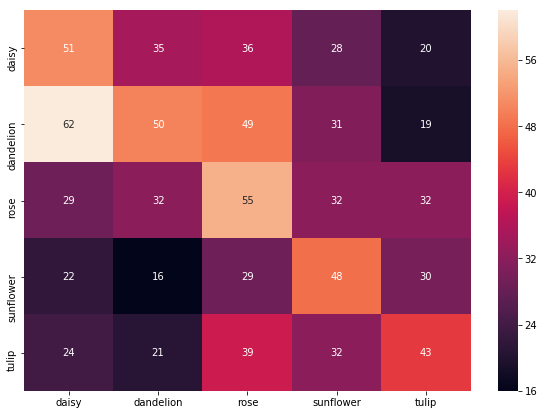

In [0]:
df_cm = pd.DataFrame(conf_mat_1, index = [i for i in ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']],
                  columns = [i for i in ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

Next - Decision Tree Classifier: 

In [0]:
model_2 = DecisionTreeClassifier()
model_2.fit(X_pca_train, y_train)
accuracy_score(y_test, model_2.predict(X_pca_test))

0.2751445086705202

In [0]:
param_grid_2 = {"max_depth":[10,15],
              "min_samples_leaf":[50,100,200],
               "splitter":["best","random"],
               "max_features":[300,600,800]}

gs_2 = GridSearchCV(estimator=model_2,param_grid=param_grid_2,cv = 5, refit=True)
gs_2.fit(X_pca_train, y_train)
gs_2.grid_scores_, gs_2.best_estimator_, gs_2.best_score_

/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.29034, std: 0.02029, params: {'max_depth': 10, 'max_features': 300, 'min_samples_leaf': 50, 'splitter': 'best'},
  mean: 0.28253, std: 0.01075, params: {'max_depth': 10, 'max_features': 300, 'min_samples_leaf': 50, 'splitter': 'random'},
  mean: 0.30509, std: 0.01983, params: {'max_depth': 10, 'max_features': 300, 'min_samples_leaf': 100, 'splitter': 'best'},
  mean: 0.28022, std: 0.01650, params: {'max_depth': 10, 'max_features': 300, 'min_samples_leaf': 100, 'splitter': 'random'},
  mean: 0.29323, std: 0.01155, params: {'max_depth': 10, 'max_features': 300, 'min_samples_leaf': 200, 'splitter': 'best'},
  mean: 0.28687, std: 0.00823, params: {'max_depth': 10, 'max_features': 300, 'min_samples_leaf': 200, 'splitter': 'random'},
  mean: 0.29005, std: 0.00968, params: {'max_depth': 10, 'max_features': 600, 'min_samples_leaf': 50, 'splitter': 'best'},
  mean: 0.30017, std: 0.00590, params: {'max_depth': 10, 'max_features': 600, 'min_samples_leaf': 50, 'splitter': 'random'},
  me

In [0]:
conf_mat_2 = confusion_matrix(y_test, model_2.predict(X_pca_test))
conf_mat_2

array([[35, 39, 41, 19, 36],
       [41, 86, 37, 17, 30],
       [37, 42, 43, 21, 37],
       [15, 30, 27, 35, 38],
       [26, 39, 25, 30, 39]])

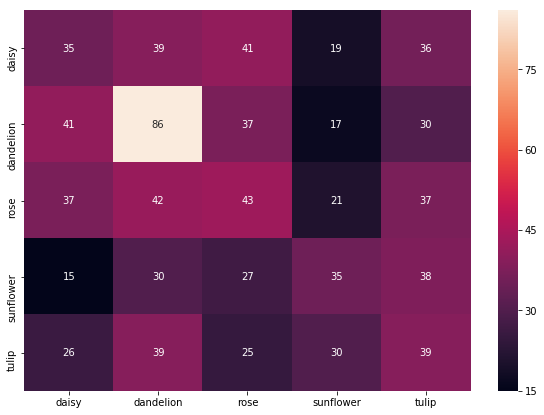

In [0]:
df_cm = pd.DataFrame(conf_mat_2, index = [i for i in ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']],
                  columns = [i for i in ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

Next - Bagging Classifier:

In [0]:
from sklearn.ensemble import BaggingClassifier

model_3 = BaggingClassifier(DecisionTreeClassifier(), 
                  max_samples=0.5, 
                  max_features=0.5, 
                  bootstrap=False)

model_3.fit(X_pca_train, y_train)
accuracy_score(y_test, model_3.predict(X_pca_test))

0.3248554913294798

In [0]:
param_grid_3 = {"n_estimators":[100, 200],
              "max_samples":[0.5,0.7],
               "max_features":[0.5,0.7]}

gs_3 = GridSearchCV( estimator=model_3, param_grid=param_grid_3, cv = 5, refit=True)
gs_3.fit(X_pca_train, y_train)
gs_3.grid_scores_, gs_3.best_estimator_,gs_3.best_score_

/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.36611, std: 0.01561, params: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100},
  mean: 0.38172, std: 0.00944, params: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200},
  mean: 0.36871, std: 0.00462, params: {'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 100},
  mean: 0.37739, std: 0.01909, params: {'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 200},
  mean: 0.37334, std: 0.01469, params: {'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 100},
  mean: 0.38028, std: 0.02042, params: {'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 200},
  mean: 0.38346, std: 0.01357, params: {'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 100},
  mean: 0.37739, std: 0.02380, params: {'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 200}],
 BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
            

In [0]:
conf_mat_3 = confusion_matrix(y_test, model_3.predict(X_pca_test))
conf_mat_3

array([[ 51,  56,  20,  13,  30],
       [ 29, 138,  14,  10,  20],
       [ 41,  58,  34,  11,  36],
       [ 23,  38,  20,  23,  41],
       [ 33,  49,  26,  16,  35]])

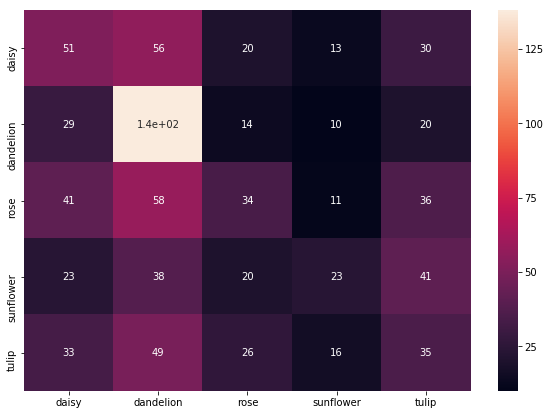

In [0]:
df_cm = pd.DataFrame(conf_mat_3, index = [i for i in ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']],
                  columns = [i for i in ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

Next - Random Forest:

In [0]:
model_4 = RandomForestClassifier(n_estimators=1000)
model_4.fit(X_pca_train, y_train)
accuracy_score(y_test, model_4.predict(X_pca_test))

0.3132947976878613

In [0]:
param_grid_4 = {'max_features': ['auto', 'sqrt'],
               'max_depth': [None, 400, 600],
              "n_estimators":[1000, 500]}

gs_4 = GridSearchCV( estimator=model_4, param_grid=param_grid_4, cv = 5, refit=True)
gs_4.fit(X_pca_train, y_train)
gs_4.grid_scores_, gs_4.best_estimator_, gs_4.best_score_

/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.36119, std: 0.01124, params: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 1000},
  mean: 0.35396, std: 0.00930, params: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 500},
  mean: 0.35281, std: 0.01068, params: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1000},
  mean: 0.35512, std: 0.00542, params: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500},
  mean: 0.35136, std: 0.00973, params: {'max_depth': 400, 'max_features': 'auto', 'n_estimators': 1000},
  mean: 0.35888, std: 0.01662, params: {'max_depth': 400, 'max_features': 'auto', 'n_estimators': 500},
  mean: 0.35888, std: 0.01230, params: {'max_depth': 400, 'max_features': 'sqrt', 'n_estimators': 1000},
  mean: 0.35946, std: 0.00993, params: {'max_depth': 400, 'max_features': 'sqrt', 'n_estimators': 500},
  mean: 0.35483, std: 0.01159, params: {'max_depth': 600, 'max_features': 'auto', 'n_estimators': 1000},
  mean: 0.35049, std: 0.01031, params: {'max_depth': 60

In [0]:
conf_mat_4 = confusion_matrix(y_test, model_4.predict(X_pca_test))
conf_mat_4

array([[ 11,  69,   2,   0,  88],
       [  3, 167,   1,   0,  40],
       [  7,  96,   2,   0,  75],
       [  1,  70,   0,   2,  72],
       [  2,  66,   2,   0,  89]])

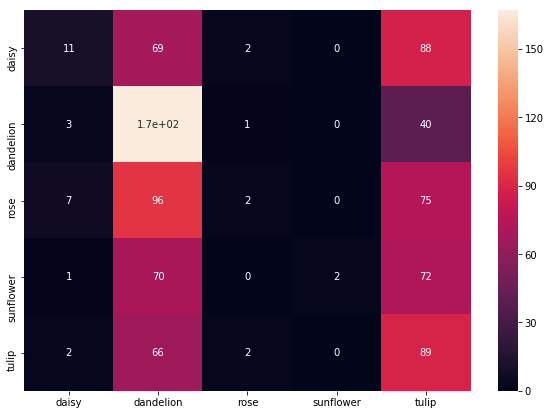

In [0]:
df_cm = pd.DataFrame(conf_mat_4, index = [i for i in ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']],
                  columns = [i for i in ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

Next - XGBoost:

In [0]:
model_5 = XGBClassifier(n_estimators=100)
model_5.fit(X_pca_train, y_train)
accuracy_score(y_test, model_5.predict(X_pca_test))

/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.3630057803468208

In [0]:
import scipy.stats as ss

params = {"n_estimators":ss.randint(50,200),
         "learning_rate":ss.uniform(0.01,0.3),
          "max_depth": ss.randint(5,30),
         "min_child_weight":ss.randint(5,50),
         "reg_lambda":ss.uniform(0.1,3)}

rs_5 = RandomizedSearchCV(cv=5, estimator=model_5, param_distributions=params,n_iter=10, verbose=10)
rs_5.fit(X_pca_train, y_train)
rs_5.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] learning_rate=0.1123337071827814, max_depth=24, min_child_weight=24, n_estimators=81, reg_lambda=0.45737939145914075 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV]  learning_rate=0.1123337071827814, max_depth=24, min_child_weight=24, n_estimators=81, reg_lambda=0.45737939145914075, score=0.3852813852813853, total= 1.9min
[CV] learning_rate=0.1123337071827814, max_depth=24, min_child_weight=24, n_estimators=81, reg_lambda=0.45737939145914075 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.9min remaining:    0.0s


[CV]  learning_rate=0.1123337071827814, max_depth=24, min_child_weight=24, n_estimators=81, reg_lambda=0.45737939145914075, score=0.3959537572254335, total= 1.9min
[CV] learning_rate=0.1123337071827814, max_depth=24, min_child_weight=24, n_estimators=81, reg_lambda=0.45737939145914075 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.7min remaining:    0.0s


[CV]  learning_rate=0.1123337071827814, max_depth=24, min_child_weight=24, n_estimators=81, reg_lambda=0.45737939145914075, score=0.37427745664739887, total= 1.9min
[CV] learning_rate=0.1123337071827814, max_depth=24, min_child_weight=24, n_estimators=81, reg_lambda=0.45737939145914075 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  7.7min remaining:    0.0s


[CV]  learning_rate=0.1123337071827814, max_depth=24, min_child_weight=24, n_estimators=81, reg_lambda=0.45737939145914075, score=0.3713872832369942, total= 1.9min
[CV] learning_rate=0.1123337071827814, max_depth=24, min_child_weight=24, n_estimators=81, reg_lambda=0.45737939145914075 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.6min remaining:    0.0s


[CV]  learning_rate=0.1123337071827814, max_depth=24, min_child_weight=24, n_estimators=81, reg_lambda=0.45737939145914075, score=0.3671988388969521, total= 1.9min
[CV] learning_rate=0.014997499147180784, max_depth=20, min_child_weight=7, n_estimators=89, reg_lambda=2.838230270753119 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 12.7min remaining:    0.0s


[CV]  learning_rate=0.014997499147180784, max_depth=20, min_child_weight=7, n_estimators=89, reg_lambda=2.838230270753119, score=0.4083694083694084, total= 3.1min
[CV] learning_rate=0.014997499147180784, max_depth=20, min_child_weight=7, n_estimators=89, reg_lambda=2.838230270753119 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 15.7min remaining:    0.0s


[CV]  learning_rate=0.014997499147180784, max_depth=20, min_child_weight=7, n_estimators=89, reg_lambda=2.838230270753119, score=0.3713872832369942, total= 3.0min
[CV] learning_rate=0.014997499147180784, max_depth=20, min_child_weight=7, n_estimators=89, reg_lambda=2.838230270753119 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 18.7min remaining:    0.0s


[CV]  learning_rate=0.014997499147180784, max_depth=20, min_child_weight=7, n_estimators=89, reg_lambda=2.838230270753119, score=0.36560693641618497, total= 3.0min
[CV] learning_rate=0.014997499147180784, max_depth=20, min_child_weight=7, n_estimators=89, reg_lambda=2.838230270753119 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 21.7min remaining:    0.0s


[CV]  learning_rate=0.014997499147180784, max_depth=20, min_child_weight=7, n_estimators=89, reg_lambda=2.838230270753119, score=0.3468208092485549, total= 3.1min
[CV] learning_rate=0.014997499147180784, max_depth=20, min_child_weight=7, n_estimators=89, reg_lambda=2.838230270753119 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.014997499147180784, max_depth=20, min_child_weight=7, n_estimators=89, reg_lambda=2.838230270753119, score=0.32801161103047893, total= 3.0min
[CV] learning_rate=0.24496877240611925, max_depth=19, min_child_weight=47, n_estimators=176, reg_lambda=1.1615962547948884 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.24496877240611925, max_depth=19, min_child_weight=47, n_estimators=176, reg_lambda=1.1615962547948884, score=0.3434343434343434, total= 2.3min
[CV] learning_rate=0.24496877240611925, max_depth=19, min_child_weight=47, n_estimators=176, reg_lambda=1.1615962547948884 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.24496877240611925, max_depth=19, min_child_weight=47, n_estimators=176, reg_lambda=1.1615962547948884, score=0.34826589595375723, total= 2.3min
[CV] learning_rate=0.24496877240611925, max_depth=19, min_child_weight=47, n_estimators=176, reg_lambda=1.1615962547948884 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.24496877240611925, max_depth=19, min_child_weight=47, n_estimators=176, reg_lambda=1.1615962547948884, score=0.34971098265895956, total= 2.3min
[CV] learning_rate=0.24496877240611925, max_depth=19, min_child_weight=47, n_estimators=176, reg_lambda=1.1615962547948884 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.24496877240611925, max_depth=19, min_child_weight=47, n_estimators=176, reg_lambda=1.1615962547948884, score=0.35260115606936415, total= 2.3min
[CV] learning_rate=0.24496877240611925, max_depth=19, min_child_weight=47, n_estimators=176, reg_lambda=1.1615962547948884 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.24496877240611925, max_depth=19, min_child_weight=47, n_estimators=176, reg_lambda=1.1615962547948884, score=0.35268505079825835, total= 2.3min
[CV] learning_rate=0.16838627114913898, max_depth=24, min_child_weight=29, n_estimators=63, reg_lambda=2.468078895232957 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.16838627114913898, max_depth=24, min_child_weight=29, n_estimators=63, reg_lambda=2.468078895232957, score=0.38095238095238093, total= 1.4min
[CV] learning_rate=0.16838627114913898, max_depth=24, min_child_weight=29, n_estimators=63, reg_lambda=2.468078895232957 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.16838627114913898, max_depth=24, min_child_weight=29, n_estimators=63, reg_lambda=2.468078895232957, score=0.37716763005780346, total= 1.3min
[CV] learning_rate=0.16838627114913898, max_depth=24, min_child_weight=29, n_estimators=63, reg_lambda=2.468078895232957 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.16838627114913898, max_depth=24, min_child_weight=29, n_estimators=63, reg_lambda=2.468078895232957, score=0.3583815028901734, total= 1.3min
[CV] learning_rate=0.16838627114913898, max_depth=24, min_child_weight=29, n_estimators=63, reg_lambda=2.468078895232957 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.16838627114913898, max_depth=24, min_child_weight=29, n_estimators=63, reg_lambda=2.468078895232957, score=0.37572254335260113, total= 1.4min
[CV] learning_rate=0.16838627114913898, max_depth=24, min_child_weight=29, n_estimators=63, reg_lambda=2.468078895232957 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.16838627114913898, max_depth=24, min_child_weight=29, n_estimators=63, reg_lambda=2.468078895232957, score=0.37155297532656023, total= 1.3min
[CV] learning_rate=0.27600458313832715, max_depth=10, min_child_weight=44, n_estimators=190, reg_lambda=1.1995262585204847 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.27600458313832715, max_depth=10, min_child_weight=44, n_estimators=190, reg_lambda=1.1995262585204847, score=0.3564213564213564, total= 2.3min
[CV] learning_rate=0.27600458313832715, max_depth=10, min_child_weight=44, n_estimators=190, reg_lambda=1.1995262585204847 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.27600458313832715, max_depth=10, min_child_weight=44, n_estimators=190, reg_lambda=1.1995262585204847, score=0.34826589595375723, total= 2.3min
[CV] learning_rate=0.27600458313832715, max_depth=10, min_child_weight=44, n_estimators=190, reg_lambda=1.1995262585204847 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.27600458313832715, max_depth=10, min_child_weight=44, n_estimators=190, reg_lambda=1.1995262585204847, score=0.3713872832369942, total= 2.3min
[CV] learning_rate=0.27600458313832715, max_depth=10, min_child_weight=44, n_estimators=190, reg_lambda=1.1995262585204847 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.27600458313832715, max_depth=10, min_child_weight=44, n_estimators=190, reg_lambda=1.1995262585204847, score=0.34971098265895956, total= 2.3min
[CV] learning_rate=0.27600458313832715, max_depth=10, min_child_weight=44, n_estimators=190, reg_lambda=1.1995262585204847 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.27600458313832715, max_depth=10, min_child_weight=44, n_estimators=190, reg_lambda=1.1995262585204847, score=0.3584905660377358, total= 2.3min
[CV] learning_rate=0.16955834654717836, max_depth=23, min_child_weight=27, n_estimators=74, reg_lambda=1.7716095874093976 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.16955834654717836, max_depth=23, min_child_weight=27, n_estimators=74, reg_lambda=1.7716095874093976, score=0.3722943722943723, total= 1.6min
[CV] learning_rate=0.16955834654717836, max_depth=23, min_child_weight=27, n_estimators=74, reg_lambda=1.7716095874093976 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.16955834654717836, max_depth=23, min_child_weight=27, n_estimators=74, reg_lambda=1.7716095874093976, score=0.3583815028901734, total= 1.6min
[CV] learning_rate=0.16955834654717836, max_depth=23, min_child_weight=27, n_estimators=74, reg_lambda=1.7716095874093976 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.16955834654717836, max_depth=23, min_child_weight=27, n_estimators=74, reg_lambda=1.7716095874093976, score=0.3598265895953757, total= 1.6min
[CV] learning_rate=0.16955834654717836, max_depth=23, min_child_weight=27, n_estimators=74, reg_lambda=1.7716095874093976 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.16955834654717836, max_depth=23, min_child_weight=27, n_estimators=74, reg_lambda=1.7716095874093976, score=0.3569364161849711, total= 1.6min
[CV] learning_rate=0.16955834654717836, max_depth=23, min_child_weight=27, n_estimators=74, reg_lambda=1.7716095874093976 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.16955834654717836, max_depth=23, min_child_weight=27, n_estimators=74, reg_lambda=1.7716095874093976, score=0.37300435413642963, total= 1.6min
[CV] learning_rate=0.03612705601039096, max_depth=19, min_child_weight=6, n_estimators=159, reg_lambda=1.4817319206512847 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.03612705601039096, max_depth=19, min_child_weight=6, n_estimators=159, reg_lambda=1.4817319206512847, score=0.4155844155844156, total= 5.1min
[CV] learning_rate=0.03612705601039096, max_depth=19, min_child_weight=6, n_estimators=159, reg_lambda=1.4817319206512847 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.03612705601039096, max_depth=19, min_child_weight=6, n_estimators=159, reg_lambda=1.4817319206512847, score=0.3959537572254335, total= 5.8min
[CV] learning_rate=0.03612705601039096, max_depth=19, min_child_weight=6, n_estimators=159, reg_lambda=1.4817319206512847 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.03612705601039096, max_depth=19, min_child_weight=6, n_estimators=159, reg_lambda=1.4817319206512847, score=0.37716763005780346, total= 5.1min
[CV] learning_rate=0.03612705601039096, max_depth=19, min_child_weight=6, n_estimators=159, reg_lambda=1.4817319206512847 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.03612705601039096, max_depth=19, min_child_weight=6, n_estimators=159, reg_lambda=1.4817319206512847, score=0.3684971098265896, total= 5.1min
[CV] learning_rate=0.03612705601039096, max_depth=19, min_child_weight=6, n_estimators=159, reg_lambda=1.4817319206512847 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.03612705601039096, max_depth=19, min_child_weight=6, n_estimators=159, reg_lambda=1.4817319206512847, score=0.3584905660377358, total= 5.2min
[CV] learning_rate=0.22700304209756828, max_depth=29, min_child_weight=45, n_estimators=164, reg_lambda=2.366029169691579 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.22700304209756828, max_depth=29, min_child_weight=45, n_estimators=164, reg_lambda=2.366029169691579, score=0.36075036075036077, total= 2.3min
[CV] learning_rate=0.22700304209756828, max_depth=29, min_child_weight=45, n_estimators=164, reg_lambda=2.366029169691579 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.22700304209756828, max_depth=29, min_child_weight=45, n_estimators=164, reg_lambda=2.366029169691579, score=0.3598265895953757, total= 2.3min
[CV] learning_rate=0.22700304209756828, max_depth=29, min_child_weight=45, n_estimators=164, reg_lambda=2.366029169691579 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.22700304209756828, max_depth=29, min_child_weight=45, n_estimators=164, reg_lambda=2.366029169691579, score=0.3713872832369942, total= 2.3min
[CV] learning_rate=0.22700304209756828, max_depth=29, min_child_weight=45, n_estimators=164, reg_lambda=2.366029169691579 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.22700304209756828, max_depth=29, min_child_weight=45, n_estimators=164, reg_lambda=2.366029169691579, score=0.36416184971098264, total= 2.3min
[CV] learning_rate=0.22700304209756828, max_depth=29, min_child_weight=45, n_estimators=164, reg_lambda=2.366029169691579 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.22700304209756828, max_depth=29, min_child_weight=45, n_estimators=164, reg_lambda=2.366029169691579, score=0.37590711175616837, total= 2.3min
[CV] learning_rate=0.050323164186793105, max_depth=22, min_child_weight=43, n_estimators=62, reg_lambda=0.6965745140690549 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.050323164186793105, max_depth=22, min_child_weight=43, n_estimators=62, reg_lambda=0.6965745140690549, score=0.39105339105339104, total= 1.3min
[CV] learning_rate=0.050323164186793105, max_depth=22, min_child_weight=43, n_estimators=62, reg_lambda=0.6965745140690549 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.050323164186793105, max_depth=22, min_child_weight=43, n_estimators=62, reg_lambda=0.6965745140690549, score=0.3959537572254335, total= 1.2min
[CV] learning_rate=0.050323164186793105, max_depth=22, min_child_weight=43, n_estimators=62, reg_lambda=0.6965745140690549 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.050323164186793105, max_depth=22, min_child_weight=43, n_estimators=62, reg_lambda=0.6965745140690549, score=0.38439306358381503, total= 1.3min
[CV] learning_rate=0.050323164186793105, max_depth=22, min_child_weight=43, n_estimators=62, reg_lambda=0.6965745140690549 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.050323164186793105, max_depth=22, min_child_weight=43, n_estimators=62, reg_lambda=0.6965745140690549, score=0.3554913294797688, total= 1.3min
[CV] learning_rate=0.050323164186793105, max_depth=22, min_child_weight=43, n_estimators=62, reg_lambda=0.6965745140690549 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.050323164186793105, max_depth=22, min_child_weight=43, n_estimators=62, reg_lambda=0.6965745140690549, score=0.36429608127721336, total= 1.3min
[CV] learning_rate=0.1125513818742295, max_depth=8, min_child_weight=29, n_estimators=81, reg_lambda=0.7313050257681544 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.1125513818742295, max_depth=8, min_child_weight=29, n_estimators=81, reg_lambda=0.7313050257681544, score=0.3795093795093795, total= 1.6min
[CV] learning_rate=0.1125513818742295, max_depth=8, min_child_weight=29, n_estimators=81, reg_lambda=0.7313050257681544 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.1125513818742295, max_depth=8, min_child_weight=29, n_estimators=81, reg_lambda=0.7313050257681544, score=0.3959537572254335, total= 1.6min
[CV] learning_rate=0.1125513818742295, max_depth=8, min_child_weight=29, n_estimators=81, reg_lambda=0.7313050257681544 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.1125513818742295, max_depth=8, min_child_weight=29, n_estimators=81, reg_lambda=0.7313050257681544, score=0.3583815028901734, total= 1.6min
[CV] learning_rate=0.1125513818742295, max_depth=8, min_child_weight=29, n_estimators=81, reg_lambda=0.7313050257681544 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.1125513818742295, max_depth=8, min_child_weight=29, n_estimators=81, reg_lambda=0.7313050257681544, score=0.3800578034682081, total= 1.6min
[CV] learning_rate=0.1125513818742295, max_depth=8, min_child_weight=29, n_estimators=81, reg_lambda=0.7313050257681544 


/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Syndka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 114.6min finished


[CV]  learning_rate=0.1125513818742295, max_depth=8, min_child_weight=29, n_estimators=81, reg_lambda=0.7313050257681544, score=0.36429608127721336, total= 1.6min


{'learning_rate': 0.03612705601039096,
 'max_depth': 19,
 'min_child_weight': 6,
 'n_estimators': 159,
 'reg_lambda': 1.4817319206512847}

In [0]:
models = []
models.append(('LogisticRegression', gs_1.best_score_))
models.append(('DecisionTreeClassifier', gs_2.best_score_))
models.append(('BaggingClassifier', gs_3.best_score_))
models.append(('RandomForestClassifier', gs_4.best_score_))
models.append(('XGBoost', rs_5.best_score_))

accuracy = []

for name, model in models:
    #print(name)
    #print("Accuracy: {}".format(model))
    accuracy.append(model)
    

d = {'accuracy': accuracy}
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['LogisticRegression','DecisionTreeClassifier',
                                         'BaggingClassifier','RandomForestClassifier',
                                         'XGBoost'])
df

,Method,accuracy
0,LogisticRegression,0.263447
1,DecisionTreeClassifier,0.310584
2,BaggingClassifier,0.383459
3,RandomForestClassifier,0.361191
4,XGBoost,0.383169


The best results reach Bagging Classifier.
The results are generally poor. In image recognition we need a lot of dimentions so to train classifier we need many images. My dataset is small, only 4242 images.
This is reason why the results are poor.


## Deep Learning

Now, we use deep neutral network to solve our problem.

First, I build my own network with convolution layers. I achieve better result I use Image Data Generator which generates batches of tensor image data with real-time data augmentation.

In [2]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers


Using TensorFlow backend.


In [18]:
data_dir = 'flowers/'
img_width = 320
img_height = 240
batch_size = 128

datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation') # set as validation data

Found 3462 images belonging to 5 classes.
Found 861 images belonging to 5 classes.


In [19]:
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Activation, Dense

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (320,240,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

print(model.summary())


model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])

nb_epochs = 50

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 320, 240, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 160, 120, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 160, 120, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 80, 60, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 80, 60, 96)        55392     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 40, 30, 96)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 40, 30, 96)        83040     
__________

In [20]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)

Epoch 1/50
27/27 [==============================] - 73s 3s/step - loss: 1.6445 - categorical_accuracy: 0.3134 - val_loss: 1.3106 - val_categorical_accuracy: 0.4635
Epoch 2/50
27/27 [==============================] - 63s 2s/step - loss: 1.1674 - categorical_accuracy: 0.5135 - val_loss: 1.1490 - val_categorical_accuracy: 0.5280
Epoch 3/50
27/27 [==============================] - 61s 2s/step - loss: 1.0938 - categorical_accuracy: 0.5632 - val_loss: 1.0210 - val_categorical_accuracy: 0.5634
Epoch 4/50
27/27 [==============================] - 62s 2s/step - loss: 1.0545 - categorical_accuracy: 0.5790 - val_loss: 1.0721 - val_categorical_accuracy: 0.5853
Epoch 5/50
27/27 [==============================] - 63s 2s/step - loss: 1.0132 - categorical_accuracy: 0.5976 - val_loss: 0.9897 - val_categorical_accuracy: 0.6098
Epoch 6/50
27/27 [==============================] - 63s 2s/step - loss: 0.9290 - categorical_accuracy: 0.6273 - val_loss: 1.0324 - val_categorical_accuracy: 0.5894
Epoch 7/50
27/27

The neutral network results are much better than classic machine learning algorytms (ML 0.3835 - vs DL 0.7435).



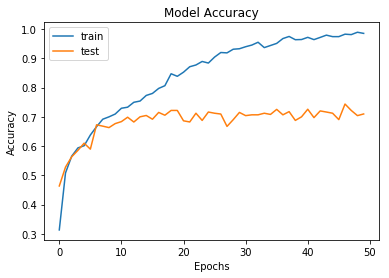

In [23]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

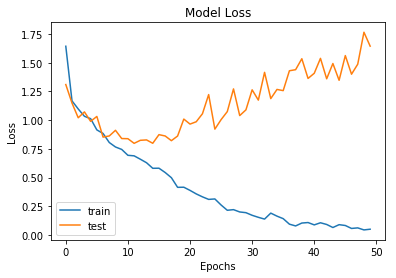

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

The last step is using Transfer Learning. I use VGG19 network.

In [8]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')

574717952/574710816 [==============================] - 6s 0us/step


W0621 05:37:58.311773 140171361716096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



In [9]:

base_model = VGG19(weights='imagenet',include_top=False, pooling='avg',input_shape=(img_width,img_height,3))

80142336/80134624 [==============================] - 1s 0us/step


In [10]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 320, 240, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 320, 240, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 320, 240, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 160, 120, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 160, 120, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 160, 120, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 80, 60, 128)       0         
__________

In [12]:
from keras.layers import Dense, Flatten, Dropout
top_model = Sequential()
top_model.add(Dense(256, activation='relu'))
top_model.add(Dense(5, activation='softmax'))

model_t = Sequential()
model_t.add(base_model)
model_t.add(top_model)

print(model_t.summary())

base_model.trainable = False




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 512)               20024384  
_________________________________________________________________
sequential_4 (Sequential)    (None, 5)                 132613    
Total params: 20,156,997
Trainable params: 132,613
Non-trainable params: 20,024,384
_________________________________________________________________
None


In [13]:
model_t.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])
history_t = model_t.fit_generator(train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)

W0621 05:38:26.302211 140171361716096 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
27/27 [==============================] - 755s 28s/step - loss: 1.3723 - acc: 0.4797 - val_loss: 1.1599 - val_acc: 0.5755
Epoch 2/50
27/27 [==============================] - 78s 3s/step - loss: 1.0645 - acc: 0.6321 - val_loss: 0.9776 - val_acc: 0.6726
Epoch 3/50
27/27 [==============================] - 64s 2s/step - loss: 0.9063 - acc: 0.6788 - val_loss: 0.8755 - val_acc: 0.6849
Epoch 4/50
27/27 [==============================] - 70s 3s/step - loss: 0.8250 - acc: 0.7126 - val_loss: 0.7735 - val_acc: 0.7285
Epoch 5/50
27/27 [==============================] - 70s 3s/step - loss: 0.7934 - acc: 0.7176 - val_loss: 0.7796 - val_acc: 0.7190
Epoch 6/50
27/27 [==============================] - 70s 3s/step - loss: 0.7562 - acc: 0.7163 - val_loss: 0.7258 - val_acc: 0.7572
Epoch 7/50
27/27 [==============================] - 70s 3s/step - loss: 0.6933 - acc: 0.7510 - val_loss: 0.6963 - val_acc: 0.7735
Epoch 8/50
27/27 [==============================] - 71s 3s/step - loss: 0.6938 - acc: 0.

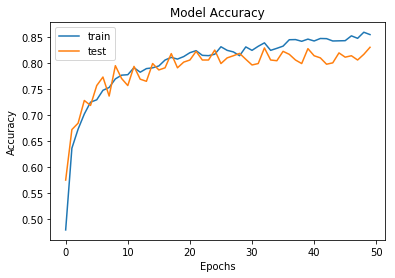

In [17]:
plt.plot(history_t.history['acc'])
plt.plot(history_t.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

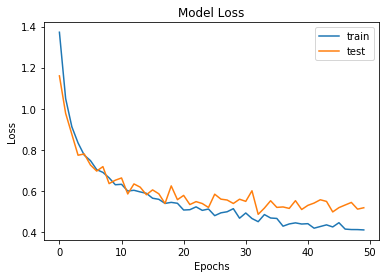

In [25]:
plt.plot(history_t.history['loss'])
plt.plot(history_t.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

We have the highest accuracy using transfer learning(0.8307). The network VGG19 was trained on huge data set. 